<a href="https://colab.research.google.com/github/estebanhernandezr/Entregas-Semanales/blob/main/Entropy_revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [ ]:
from typing import BinaryIO, Dict, Sequence, Tuple
import numpy as np
from math import log
import matplotlib.pyplot as plt
import string
import random
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#Entropy

##Hyper-parameters

In [ ]:
base = 2
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',' k', 'l', 'm',
            'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z']

##Entropy by *Ralph Hartley* (1928)
A quantitative measure of information was presented in *Bell System Technical
Journal* already 1928 by *Ralph Hartley*: *the information content*, $I_H$, in a
message consisting of $n$ characters, each of them chosen from an alphabet
of $N$ different symbols, should be proportional to the length $n$ multiplied
by some function of the size of the alphabet, $f(N)$, so that $I_H = nf(N)$.

The functional form of *the information content* is supported by the argument that if the message is coded using an alphabet of different size $N_0$ resulting in another length $n_0$, then *the information content* should not change: $I_H = n_0f(N_0)$. The function $f$ that preserves the *information content* is $log_K$, where $K$ is an arbitrary base of the logarithm: different $K$ just results in a scaling of *the information content*.

Therefore, *Ralph Hartley* formulated *the information content* as
$$I_H(n,N)=n\,log_{K}(N),$$
where $n$ is the length of the message and $N$ is the cardinality of the alphabet.


In [ ]:
def Message_Hartley_Entropy(message: str, alpha: int) -> float:
    entropy_per_message: float = len(message)*log(alpha, base)
    return entropy_per_message

def Symbol_Hartley_Entropy(message: str, alpha: int) -> float:
    entropy_per_message: float = len(message)*log(alpha, base)
    entropy_per_symbol: float = entropy_per_message/len(message)
    return entropy_per_symbol

*Hartley*'s approach, nonetheless, builds upon the worst case escenario: all symbols are equally likely to appear next in the sequence, as we may witness with the *Shannon's information content (generalized) formulation*, in the next subsection.

As a matter of fact, the *Hartley's information content* does not depend on the sequence itself, but only on its lenght and the length of the alphabet it was written with: really, not even on the symbols themselves. Indeed, we could have omitted passing the message string to the *Message_Hartley_Entropy* and *Symbol_Hartley_Entropy* functions, as a parameter: and we may later.

The previous is illustrated below.

**FACT**: Whenever we generate a random sequence of characters, taken from any alphabet, we will always get the same value for the *Hartley's information content* measure, as long as the length of the sequence stays the same as well as the length of the alphabet.

Try it yourself...

In [ ]:
n = 60
print('length of the message:', n)
print('size of the alphabet:', len(string.ascii_letters), end='\n\n')

cad = ''.join(random.choice(string.ascii_letters) for _ in range(n))
print('random message:', cad, end='\n\n')
print('message entropy:', Message_Hartley_Entropy(cad, len(alphabet)))
print('symbol entropy:', Symbol_Hartley_Entropy(cad, len(alphabet)))

length of the message: 60
size of the alphabet: 52

random message: ydUBxUpoNMnBaIUKgFShrCcmTzOpDSSSStodsBXrTotzTbhOQHsrOdMjRzXM

message entropy: 278.63137138648347
symbol entropy: 4.643856189774724


As a matter of fact, here is some subtle detail that is worth noting: different values for the base $K$ results just in a scaling of the *Hartley's information content*. We show this by interpretating $K$ in terms of combinatory.

What we got is a scaling of a logaritmic function for the *Hartley's information content* in the message: the scaling factor is the length of the message; the logaritmic function, the *Hartley's information content* per symbol, depends not only on the size of the alphabet, but also on the base $K$. Indeed, we would like to generate $N$ different symbols with an alphabet of $K$ symbols (encode). For that end, note that
$$N=K^{log_{K}(N)}.$$
In this context, the quantity $log_{K}(N)$ is interpreted as the exact number of *placeholders* needed to form $N$ different combinations with $K$ symbols.  

By the *pigeonhole principle*, if $K<N$, then at least one of the $N$ symbols must be encoded with two or more of the $K$ symbols *i.e* the number of *placeholders*, $log_{K}(N)$, must be grater or equal than $2$, in order to asign each symbol a unique code. For fixed $K$, $log_{K}(N)$ is an increasing function of $N$. However, for $N'>N$, one can match combinations of two or more symbols from the smaller alphabet to the remaining unmatched $N'-N$ symbols in the larger alphabet. Therefore, the number of *placeholders*, $log_{K}(N)$, increase, but at the same time, the message itself can be written in the new alphabet with less symbols: since combinations of symbols in the smaller alphabet can be written as only one symbol from the larger alphabet. So, there will be more *placeholders* per symbol, but less symbols, in the code.

The most straightforward way to illustrate this is with the powers of a given alphabet size $N$: $N^{2}$, $N^{3}$, ..., $N^{p}$. For the sizes of alphabet therein you can interpolate safely, as long as $log_{K}(⋅)$ is an monotically increasing function of its argument. In this case, all $N$ symbols of the smaller alphabet are asigned to the "first" $N$ symbols of the larger alphabet. Then, the remaining $N^{p-1}$ symbols in the larger alphabet can be matched with all the $p$-length combinations of symbols from the smaller alphabet. This reduces the length of the message from $n$ symbols to $\frac{n}{p-1}$.

(Now that we have understood the physical meaning behind the parameters of the entropy functions, we can start working with the mathematical definition itself, while keeping the forement in mind. For this end, we redefine the *information content* functions above into a more general formulation, where the parameters of the functions are not restricted to their physical meaning.)

In [ ]:
def Message_Hartley_Entropy_generalized(n: float, alpha: int) -> float:
    entropy_per_message: float = n*log(alpha, base)
    return entropy_per_message

def Symbol_Hartley_Entropy_generalized(n: float, alpha: int) -> float:
    entropy_per_message: float = n*log(alpha, base)
    entropy_per_symbol: float = entropy_per_message/n
    return entropy_per_symbol

Nothing has really changed, but now the parameters are continous. Anyway, the previous analysis still true as we may see.

Try it yourself...

In [ ]:
Message_Hartley_Entropies = []
Symbol_Hartley_Entropies = []
Sizes_of_alphabet = []

n = 60

powers = 30
for size in range(1, powers, 1):
    #Message_Hartley_Entropies.append((n/size)*log(n**size, base))
    Message_Hartley_Entropies.append(Message_Hartley_Entropy_generalized(n/size, n**size))
    Symbol_Hartley_Entropies.append(Symbol_Hartley_Entropy_generalized(n/size, n**size))
    Sizes_of_alphabet.append(n/size)

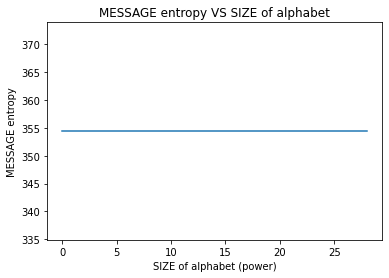

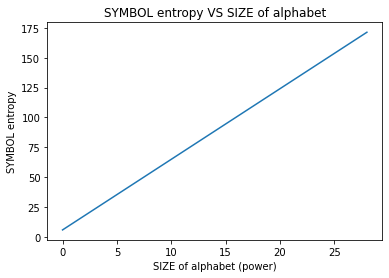

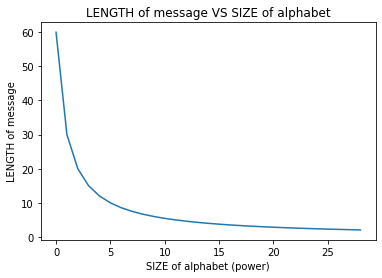

In [ ]:
plt.title('MESSAGE entropy VS SIZE of alphabet')
plt.xlabel('SIZE of alphabet (power)')
plt.ylabel('MESSAGE entropy')
plt.plot(Message_Hartley_Entropies)
plt.show()
plt.title('SYMBOL entropy VS SIZE of alphabet')
plt.xlabel('SIZE of alphabet (power)')
plt.ylabel('SYMBOL entropy')
plt.plot(Symbol_Hartley_Entropies)
plt.show()
plt.title('LENGTH of message VS SIZE of alphabet')
plt.xlabel('SIZE of alphabet (power)')
plt.ylabel('LENGTH of message')
plt.plot(Sizes_of_alphabet)
plt.show()

As expected, what we can see here is that, $log_{K}(N)$, interpreted as the generalization of the number of *placeholders*, increases with, $N$, interpreted as the generalization of the alphabet size: more symbols to enconde require more *placeholders* in the code. While, the length of the message decreases with $N$. This is the reason why they all have the same entropy per message, even when they have a different entropy per symbol. Indeed, the number of *placeholders* and the entropy per symbol balance themselves: when one increases, the other decreases, to mantain the same entropy per message throughout changes on the size of the alphabet.

You can try changing the *base* hyperparameter defined at the top cell and verify that the shape of the curves does not change, but only the scale of the *y-axis*.

##Entropy by *Claude Shannon* (1948)

¿Remember how we defined *Hartley's information content*?: 

In [ ]:
def Message_Hartley_Entropy_generalized(n: float, alpha: int) -> float:
    entropy_per_message: float = n*log(alpha, base)
    return entropy_per_message

def Symbol_Hartley_Entropy_generalized(n: float, alpha: int) -> float:
    entropy_per_message: float = n*log(alpha, base)
    entropy_per_symbol: float = entropy_per_message/n
    return entropy_per_symbol

Como una función que para cada par de valores $n$ y $N$, corresponde un único valor de información: donde $N$ define el contenido de información por símbolo, y $n$ el contenido de información por mensaje. Pero vimos que el mensaje en sí era un parámetro libre. Por lo que, de hecho, existen un total de $N^{n}$ cadenas a las cuales se les asigna el mismo número de bits para su codificación, es decir, el mismo contenido de información de Hartley. Y podemos ver que el número de mensajes con el mismo contenido de información crece exponencialmente con la longitud del mensaje.

Esto sucede porque nuestro alfabeto, $\mathcal{A}=\{ \alpha_{1}, \alpha_{2}, ..., \alpha_{N}\}$, se puede caracterizar por las probabilidades de cada símbolo: $\{P(\alpha_{1}), P(\alpha_{2}), ..., P(\alpha_{N})\}$; de modo que, si la cantidad de bits necesarios para codificar $\alpha_{i}$ es $\ell(\alpha_{i})$, entonces la **longitud promedio** del mensaje codificado será $$L=\sum_{i=1}^{N}\ell(\alpha_{i})\,P(\alpha_{i}).$$ No en vano, observe que si $\ell(\alpha_{i})=log_{K}(N)$ para todo $i=1,2,...,N$, entonces $L=log_{K}(N)\sum_{i=1}^{N}p(\alpha_{i})$, lo cual restringe a que $\sum_{i=1}^{N}p(\alpha_{i})=n$ (la medida de contenido de información de Hartley), ya que todos tienen la misma longitud. De esta manera, se logra garantizar que tenemos el número exacto de palabras código para codificar cada símbolo del alfabeto de manera única, aunque $\ell(\alpha_{i})=log_{K}(N)$ no necesariamente minimiza la longitud promedio del mensaje codificado $L$: si lo hiciera, las cadenas de longitud $n$ compuestas por un único símbolo (repetido) necesitarian un menor número de bits para codificarse, que, por ejemplo, una cadena de longitud $n$ donde todos los símbolos aparecen casi todos el mismo número de veces (tienen la misma probabilidad de aparición). Esto es lo que ocasiona que a $N^{n}$ mensages distintos se les esté asignando la misma medida de información: $\ell(\alpha_{i})=log_{K}(N)$ NO minimiza la longitud promedio del mensaje codificado.

Ahora bien, si quisieramos un código que además de decodificable de manera única (como lo hizo Hartley) también minimize la longitud promedio del mensaje codificado. Podriamos partir suponiendo que ya tenemos un código $S$, de tamaño $N$, decodificable de manera única sobre un alfabeto de tamaño $K$, con longitudes de palabras código: $\ell(\alpha_{1}), \ell(\alpha_{2}), ..., \ell(\alpha_{N})$. A continuación, denotemos $$C=\sum_{i=1}^{N}\frac{1}{K^{\ell(\alpha_{i})}}.$$

Luego, observe que: $$C^{m}=\left(\sum_{i=1}^{N}\frac{1}{K^{\ell(\alpha_{i})}}\right)^{m}=\sum_{i_{1}=1}^{n}\sum_{i_{2}=1}^{n}\cdot\cdot\cdot \sum_{i_{m}=1}^{n}K^{-\left(\ell(\alpha_{i_1})+\ell(\alpha_{i_2})+\cdot\cdot\cdot+\ell(\alpha_{i_m})\right)}$$ para $m\in \mathbb{N}$. Por otro lado, consideremos el conjunto de todas las combinaciones de tamaño $m$ de palabras código del código $S$, $S^{m}$, en forma de palabras compuestas: $s_{i_{1}}, s_{i_{2}}, ..., s_{i_{m}}$, donde $1\leq i_{1}, i_{2}, ..., i_{m}\leq N$. Ahora bien, asumiendo que $S$ es un código decodificable de manera única, entonces $s_{i_{1}}, s_{i_{2}}, ..., s_{i_{m}}=s_{j_{1}}, s_{j_{2}}, ..., s_{j_{m}}$, implica que $i_{1}=j_{1}$, $i_{2}=j_{2}$, ..., $i_{m}=j_{m}$. Así que, podemos asignar cada sumando a su posición en la cadena de $m$ palabras código, garantizando que cada combinación de los sumandos corresponde a una única palabra en $S^{m}$.

Por lo anterior, podemos reescribir: $$C^{m}=\sum_{\ell=1}^{m\,\ell_{max}}q_{\ell} K^{-\ell},$$ donde $q_{\ell}$ es el número de palabras en $S^{m}$ de longtud $\ell$, y $\ell_{max}$ es la longitud de la palabra código más larga en $S$.

Lo que se hizo fue contar el número de palabras de longitud $\ell$ por medio de $q_{\ell}$, en lugar de por medio de las combinaciones de los contadores $i$'s. También se garantiza que se eleva a todas la potencias, tomando a $\ell$ desde 1, hasta $m\,\ell_{max}$.

No obstante, para un alfabeto de $K$ símbolos, existen exactamente $K^{\ell}$ combinaciones de longitud $\ell$. Por lo cual cual, $q_{\ell}\leq K^{\ell}$.

Por lo anterior, $$C^{m}\leq \sum_{\ell=1}^{m\,\ell_{max}}K^{\ell}K^{-\ell}=m\,\ell_{max}.$$

Por lo tanto, $$\sum_{i=1}^{N}\frac{1}{K^{\ell(\alpha_{i})}}=C\leq \left(m\,\ell_{max}\right)^{\frac{1}{m}}.$$

Ahora bien, dado que tomamos $m\in\mathbb{N}$ arbitrario, entonces la cota anterior de $C$ se cumple para todo $m$. No en vano, la cantidad $\left(m\,\ell_{max}\right)^{\frac{1}{m}}$ tiende a $1$ asimptoticamente, por lo cual podemos concluir que $$\sum_{i=1}^{N}\frac{1}{K^{\ell(\alpha_{i})}}\leq 1,$$ pues de lo contrario, la desigualdad no sería cierta a partir de algún $m$ suficientemente grande.

Así pues, vemos que una consecuencia de considerar un código unicamente decodificable es que; se puede acotar $C^{m}$ para todo $m\in\mathbb{N}$ siempre y cuando $\sum_{i=1}^{N}K^{-\ell(\alpha_{i})}\leq 1$. Es decir, hemos demostrado por **reducción al absurdo** que: considerar un código únicamente decodificable con longitudes de palabras código $\{\ell(\alpha_{1}), \ell(\alpha_{2}), ..., \ell(\alpha_{N})\}$, implica que $$\sum_{i=1}^{N}K^{-\ell(\alpha_{i})}\leq 1.$$


No en vano, dada una secuencia ordenada de números naturales: $$\ell(\alpha_{1})\leq \ell(\alpha_{2})\leq \cdot\cdot\cdot \leq \ell(\alpha_{N}),$$ tales que $$\sum_{i=1}^{N}K^{-\ell(\alpha_{i})}\leq 1,$$ se puede construir un código de la siguiente manera:

Consideremos un árbol $K$-enario completo (es decir, donde cada nodo tiene exactamente $K$ hijos) de profundidad $\ell(\alpha_{N})$ (es decir, de $\ell(\alpha_{N})$ generaciones). Primero, tomemos cualquiera de los nodos del árbol que están en el nivel $\ell(\alpha_{1})$ de profundidad en el árbol; hagamos que este nodo corresponda a la primera palabra código de nuestro código. Desde ese momento, todos los nodos descendientes de este nodo los consideramos como inadecuados para su inclusión en el código, y por tanto, no los incluiremos en él: el total de nodos hojas que se excluyen del código es $K^{\ell(\alpha_{N})-\ell(\alpha_{1})}$, ya que el árbol es completo.

En una siguiente iteración, tomamos alguno de los $K^{\ell(\alpha_{N})-\ell(\alpha_{1})}$ nodos, que aún son considerados, que esté en el nivel $\ell(\alpha_{2})$ de profundidad en el árbol como una nueva palabra código. Esta vez, excluimos los $K^{\ell(\alpha_{N})-\ell(\alpha_{2})}$ nodos hojas descendientes de este nodo. Continuamos de esta manera, asignando palabras código en los niveles de profundidad restantes: $\ell(\alpha_{3}), \ell(\alpha_{4}), ..., \ell(\alpha_{N})$. Despues de las $N$ iteraciones se habrá excluido un total de $$\sum_{i=1}^{N}K^{\ell(\alpha_{N})-\ell(\alpha_{i})}$$ nodos hoja. En ese momento, debemos preguntarnos sí hemos excluido más nodos hojas que los $K^{\ell(\alpha_{N})}$ que posee el árbol $K$-enario completo: de ser así, entonces no alcanzan los nodos para asignar uno a cada una de las $N$ palabras código mediante la construcción anterior. Sin embargo, asumiendo que $$\sum_{i=1}^{N}K^{-\ell(\alpha_{i})}\leq 1,$$ se sigue que $$\sum_{i=1}^{N}K^{\ell(\alpha_{N})-\ell(\alpha_{i})}\leq K^{\ell(\alpha_{N})}.$$ Por lo cual, el código que hemos construido codifica apropiadamente los $N$ símbolos del alfabeto.

Ahora bien, un árbol $K$-enario donde cada nodo en el árbol es, o bien, una palabra clave ó un prefijo propio de una palabra clave, hace que el código implementado por el árbol sea decodificable de forma única, ya que existe un único camino desde la raíz hasta cualquier nodo del árbol y nunca pasa por más de una palabras código en el transcurso: el camino desde la raíz del árbol hasta cualquier palabra código es único, de modo que dada una palabra código siempre se puede reconstruir el cámino desde la raíz (es decir, los pasos del algoritmo que lo generaron, por construcción).

Al tipo de código anterior, se le llama **código libre de prefijos**. En ese orden de ideas, un *código libre de prefijos* es uno en el cual ninguna palabra código es un prefijo de cualquier otra palabra código. Por ejemplo, el código $\{0, 10, 11\}$ es *libre de prefijos*, pero el código $\{0, 1, 01\}$ no lo es: en este último la palabra código $0$ es una hoja y un nodo interno al mismo tiempo, por el cual pasan dos caminos distintos que van hacia $0$ y $01$.

En conclusión, siempre es posible construir un **código libre de prefijos** de tamaños $\ell(\alpha_{1}), ..., \ell(\alpha_{N})$ para un alfabeto de tamaño $N$, cuando lo se quiere es codificar de forma única el alfabeto sobre otro de tamaño $K$. Esto significa que existe una forma sistemática de construir un código invertible para cualquier alfabeto. 

No obstante, de todas las formas posibles en las que se puede codificar un alfabeto, esta en particular resulta especialmente interesante, en parte, por el siguiente resultado:

Antes, vale la pena redactar el razonamiento anterior para su uso en el teorema que sigue:

**LEMA:** Existe un código libre de prefijos con longitudes de palabras código $\ell(\alpha_{1}), ..., \ell(\alpha_{N})$ ***si y solamente sí*** $$\sum_{i=1}^{N}K^{-\ell(\alpha_{i})}\leq 1.$$
**Demostración:** $(\implies)$ Como vimos, todo código libre de prefijos es unicamente decodificable. No obstante, también demostramos, por absurdo, que tener un código unicamente decodificable de tamaños $\ell(\alpha_{1}), ..., \ell(\alpha_{N})$, implica que $\sum_{i=1}^{N}K^{-\ell(\alpha_{i})}\leq 1$.

$(\impliedby)$ Por otro lado, acabamos de ver que si $\sum_{i=1}^{N}K^{-\ell(\alpha_{i})}\leq 1$, entonces es posible construir un código libre de prefijos con esas longitudes de palabras código.

Ahora si estamos listos para presentar y demostrar el resultado:

**TEOREMA:** $L_{min}$, la longitud promedio mínima del mensaje codificado, sobre todas los posibles códigos libres de prefijos para $\mathcal{A}$, satisface que $$H[\mathcal{A}]\leq L_{min}\leq H[\mathcal{A}]+1.$$ Para cada símbolo. Donde $H[\mathcal{A}]=\sum_{i=1}^{N}p(\alpha_{i})log_{K}\left(\frac{1}{p(\alpha_{i})}\right)$.

**Demostración:** ($H[A]\leq L$): $$H[A]-L=\left(\sum_{i=1}^{N}p(\alpha_{i})log_{K}\left(\frac{1}{p(\alpha_{i})}\right)\right)-\left(\sum_{i=1}^{N}p(\alpha_{i})\,\ell(\alpha_{i})\right)\\ = \left(\sum_{i=1}^{N}p(\alpha_{i})log_{K}\left(\frac{1}{p(\alpha_{i})}\right)\right)-\left(\sum_{i=1}^{N}p(\alpha_{i})\,log_{K}\left(K^{\ell(\alpha_{i})}\right)\right) \\ = \sum_{i=1}^{N}\left(p(\alpha_{i})log_{K}\left(\frac{1}{p(\alpha_{i})}\right)-p(\alpha_{i})\,log_{K}\left(K^{\ell(\alpha_{i})}\right)\right)\\= \sum_{i=1}^{N}p(\alpha_{i})\left(log_{K}\left(\frac{1}{p(\alpha_{i})}\right)-\,log_{K}\left(K^{\ell(\alpha_{i})}\right)\right) \\= \sum_{i=1}^{N}p(\alpha_{i})log_{K}\left(\frac{K^{-\ell(\alpha_{i})}}{p(\alpha_{i})}\right).$$ Ahora bien, es sabido que $log_{K}(x)\leq x-1$, de donde se sigue que $$H[A]-L\leq log_{K}(e)\sum_{i=1}^{N}p(\alpha_{i})\left(\frac{K^{-\ell(\alpha_{i})}}{p(\alpha_{i})}-1\right)=log_{K}(e)\left(\sum_{i=1}^{N}K^{-\ell(\alpha_{i})}-\sum_{i=1}^{N}p(\alpha_{i})\right).$$ Ahora bien, dado $L_{min}$ se obtuvo para un código libre de prefijos, por el lema anterior, entonces se sigue que $\sum_{i=1}^{N}K^{-\ell(\alpha_{i})}\leq 1$. Mientras que, $\sum_{i=1}^{N}p(\alpha_{i})=1$. Por lo tanto, $$H[A]-L\leq log_{K}(e)\left(\sum_{i=1}^{N}K^{-\ell(\alpha_{i})}-\sum_{i=1}^{N}p(\alpha_{i})\right)\leq 0.$$ Por lo tanto $H[A]\leq L$.

($L_{min}\leq H[A]+1$): Debemos probar que existe un código libre de prefijos tal que $L\leq H[A]+1$. Para eso, el suficiente con tomar longitudes de las palabras código: $\ell(\alpha_{1}), ..., \ell(\alpha_{N})$, de la siguiente manera: $$\ell(\alpha_{i})=\left\lceil log_{K}\left(\frac{1}{p(\alpha_{i})}\right)\right\rceil.$$

No en vano, por definición se tiene que: $$log_{K}\left(\frac{1}{p(\alpha_{i})}\right)\leq \ell(\alpha_{i})\leq log_{K}\left(\frac{1}{p(\alpha_{i})}\right)+1.$$ De donde se sigue que: $$K^{-\ell(\alpha_{i})}\leq p(\alpha_{i}).$$ Por lo tanto $$\sum_{i=1}^{N}K^{-\ell(\alpha_{i})}\leq \sum_{i=1}^{N}p(\alpha_{i})=1.$$

Por lo tanto $\sum_{i=1}^{N}K^{-\ell(\alpha_{i})}\leq 1$, por lo que, por el lema anterior, existe un código libre de prefijos.

Por esto, consideramos la cantidad $H[\mathcal{A}]$ como una medida de información en el sentido sugerido, originalmente, por *Hartley*: surge de la descripción de un código decodificable de forma única (y, que además minimiza la longitud promedio de la palabra codificada) de un alfabeto.

*Claude Shannon* llamó a la cantidad $H[\mathcal{A}]$ entropía, en honor a la entropía de la termodinámica, al darse cuenta de que era la única cantidad tal que es máxima cuando $p(\alpha_{i})$ es igual para todo $i$.


Nonetheless, consider the quantity:
$$log_{K}\left(\frac{1}{p}\right),$$
where $p$ is a real value in the interval $[0,1]$.

In [ ]:
base = 2
def f(prob):
    entropy = log(1/prob, base)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
    ax1.set_title('bits used to code symbol')
    ax1.plot(np.arange(1, 100), [log(val, base) for val in np.arange(1, 100)], 'r')
    ax1.scatter([1/prob], [entropy])
    ax2.set_title('total bits contributed to the message')
    ax2.axhline(y = prob*entropy, color = 'r', linestyle = '-')
    plt.show()
    return entropy
interact(f, prob=widgets.FloatLogSlider(value=0.5, base=10, min=-5, max=0.1))

interactive(children=(FloatLogSlider(value=0.5, description='prob', max=0.1, min=-5.0), Output()), _dom_classe…

<function __main__.f>

As a matter of fact, the more probable a symbol is, the shortest the code assigned to it is. Therefore, most probable symbols are assigned to shortest codewords and, inversely, the most unprobable symbols are assigned to the longest codewords. Causing the extreme probable events to have a less significant impact on the total length of the coded message.